In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [2]:
heart_data = pd.read_csv(r'C:\Users\Pratham Singh Yadav\OneDrive\Desktop\Outbreak\dataset\heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [8]:
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [9]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=2)

In [12]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2


In [13]:
y_train.head()

237    0
106    1
10     1
153    1
77     1
Name: target, dtype: int64

In [14]:
model = svm.SVC(kernel='linear')

In [15]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [16]:
y_predc = model.predict(x_test)

In [17]:
print('accuracy score:', accuracy_score(y_test, y_predc))

accuracy score: 0.8688524590163934


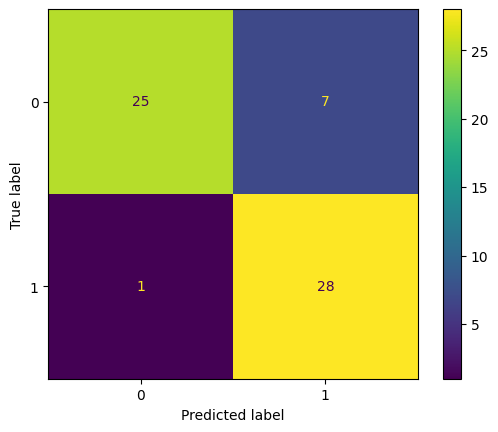

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [19]:
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

Recall = recall_score(y_test, y_predc)
Precision = precision_score(y_test, y_predc)
F1 = f1_score(y_test, y_predc)
Confusion_matrix = confusion_matrix(y_test, y_predc)
print('Recall:', Recall)
print('Precision:', Precision)
print('F1:', F1)
print('Confusion_matrix:\n', Confusion_matrix)


Recall: 0.9655172413793104
Precision: 0.8
F1: 0.875
Confusion_matrix:
 [[25  7]
 [ 1 28]]


In [20]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='all')

In [21]:
x_resampled, y_resampled = tl.fit_resample(x, y)

In [22]:
resampled_data  = x_resampled.shape, y_resampled.shape
original_data = x.shape, y.shape
print('Resampled data:', resampled_data, '\noriginal_data:',original_data)

Resampled data: ((245, 13), (245,)) 
original_data: ((303, 13), (303,))


In [23]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=2)

In [24]:
model_resampled = svm.SVC(kernel='linear')

In [25]:
model_resampled.fit(x_resampled_train, y_resampled_train)

SVC(kernel='linear')

In [26]:
y_resampled_predc = model_resampled.predict(x_resampled_test)

In [27]:
Accuracy = accuracy_score(y_resampled_test, y_resampled_predc)
Recall = recall_score(y_resampled_test, y_resampled_predc)
Precision = precision_score(y_resampled_test, y_resampled_predc)
F1 = f1_score(y_resampled_test, y_resampled_predc)
Confusion_matrix = confusion_matrix(y_resampled_test, y_resampled_predc)
print('Accuracy:', Accuracy)
print('Recall:', Recall)
print('Precision:', Precision)
print('F1:', F1)
print('Confusion_matrix:\n', Confusion_matrix)

Accuracy: 0.7959183673469388
Recall: 0.9285714285714286
Precision: 0.7647058823529411
F1: 0.8387096774193549
Confusion_matrix:
 [[13  8]
 [ 2 26]]


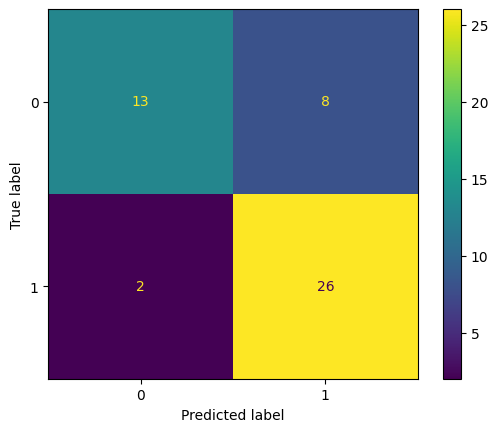

In [28]:
ConfusionMatrixDisplay.from_estimator(model_resampled, x_resampled_test, y_resampled_test)

In [29]:
import pickle
import os
filenname =os.path.join(r'C:\Users\Pratham Singh Yadav\OneDrive\Desktop\Outbreak\Save_model','heart-disease-mode.sav')
pickle.dump(model_resampled, open(filenname, 'wb'))